# 🛍️ Retail Sales Prediction
This notebook builds a linear regression model to predict total net sales using retail transaction data. Steps include missing value imputation, data encoding, feature engineering, and model evaluation.


## Data Loading & Cleaning


In [4]:
import pandas as pd
dt = pd.read_csv("dataset.csv")

dt.isna().sum()# find the missing value

Product Type       8
Net Quantity       0
Gross Sales        0
Discounts          0
Returns            0
Total Net Sales    0
dtype: int64

<AxesSubplot:>

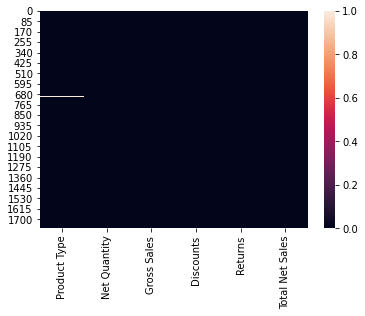

In [5]:
import seaborn as sns
sns.heatmap(dt.isnull())

In [6]:
dt['Product Type']=dt['Product Type'].str.replace("Art & Sculpture","Art&Sculpture")
dt['Product Type']=dt['Product Type'].str.replace("Home Decor","Home_Decor")
dt['Product Type']=dt['Product Type'].str.replace("Fair Trade Gifts","Fair_Trade_Gifts")
dt['Product Type']=dt['Product Type'].str.replace("Gift Baskets","Gifts_Baskets")
dt['Product Type']=dt['Product Type'].str.replace("Recycled Art","Recycled_Art")
dt['Product Type']=dt['Product Type'].str.replace("Skin Care","Skin_Care")
dt['Product Type']=dt['Product Type'].str.replace("One-of-a-Kind","One_of_a_Kind")

In [7]:
##fill the missing value in Product type by mode
dt["Product Type"].value_counts() ##Basket has the highest counts value
dt['Product Type'].fillna(dt['Product Type'].mode()[0], inplace = True)

## Linear Regression

In [8]:
#create dummy variables
dt1=pd.get_dummies(dt,drop_first = True)

#drop column gross sales because it is not independent variable
dt1=dt1.drop(['Gross Sales'],axis=1)

x=dt1.drop("Total Net Sales",axis=1)
y=dt1["Total Net Sales"]

In [6]:
##train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

##build linear regression
from sklearn.linear_model import LinearRegression
lm=LinearRegression() #initialize the model
lm.fit(x_train,y_train) #fitting the model (or training it)

LinearRegression()

In [7]:
#evaluate model on the testing data with r2 and mrse
y_pred=lm.predict(x_test)
from sklearn.metrics import r2_score,mean_squared_error, f1_score
print("R Square is ",r2_score(y_test,y_pred))
mse=mean_squared_error(y_test,y_pred)
rmse=mse**0.5
print("rmse is ",rmse)

R Square is  0.7853787632744407
rmse is  285.9178081272122


In [8]:
##scale the variable
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)

x_train_scaled=scaler.transform(x_train)
x_test_scaled= scaler.transform(x_test)

lm.fit(x_train_scaled,y_train) #fitting the model (or training it)

LinearRegression()

In [9]:
#evaluate model on the testing data with f1, r2, and mrse
y_pred_scaled=lm.predict(x_test_scaled)
from sklearn.metrics import r2_score,mean_squared_error, f1_score
mse_scaled=mean_squared_error(y_test,y_pred_scaled)
rmse_scaled=mse_scaled**0.5
print("R Square is ",r2_score(y_test,y_pred_scaled))
print("Rmse is",rmse_scaled)

R Square is  0.7853787632744405
Rmse is 285.91780812721225


## PCAs

In [10]:
##pcas
##step1: normalize the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

##step2: do pca
from sklearn.decomposition import PCA
pca=PCA(n_components=2)##get 2 new variables
pca.fit(x_train_scaled)
x_train_scaled_pca=pca.transform(x_train_scaled)
x_test_scaled_pca=pca.transform(x_test_scaled)


lm.fit(x_train_scaled_pca,y_train)
y_pred_scaled_pca=lm.predict(x_test_scaled_pca)

In [11]:
#evaluate model on the testing data with f1, r2, and mrse

print("R Square is ",r2_score(y_test,y_pred_scaled_pca))
mse=mean_squared_error(y_test,y_pred_scaled_pca)
rmse=mse**0.5
print("rmse is ",rmse)

R Square is  0.7817949070245005
rmse is  288.2951264033866


## Random Forest

[2.71672885e-01 6.55198275e-01 1.77299947e-02 1.12722222e-02
 2.54502477e-02 7.71155083e-04 2.55049087e-07 2.48477533e-04
 9.22114637e-04 5.05700114e-06 6.80115310e-03 3.10841786e-03
 2.67653570e-04 3.13492319e-03 5.42592477e-04 9.76958500e-04
 1.08020526e-03 1.83272758e-04 4.78367771e-04 1.55771645e-04]


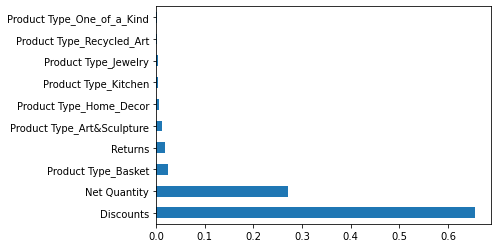

In [12]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor 

model = RandomForestRegressor ()
model.fit(x_train_scaled,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances 
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [13]:
##run a loop to find the best value of k 
cols = ["k","R_Square","rmse"] 
lst=[] ##Create rows and columns to record the value of k, R_square and rmse
from sklearn.feature_selection import SelectKBest,f_regression
for i in range(20):
    i=i+1
    bestfeatures=SelectKBest(score_func=f_regression,k=i)
    new_x=bestfeatures.fit_transform(x,y)
    x_train,x_test,y_train,y_test=train_test_split(new_x,y,test_size=0.3,random_state=1)
    scaler.fit(x_train)
    x_train_scaled=scaler.transform(x_train)
    x_test_scaled= scaler.transform(x_test)
    lm.fit(x_train_scaled,y_train)
    y_pred_scaled=lm.predict(x_test_scaled)
    mse=mean_squared_error(y_test,y_pred_scaled)
    rmse=mse**0.5
    lst.append([i,r2_score(y_test,y_pred_scaled),rmse]) #add k, R Square and rmse to rows to form a new dataframe


df3 = pd.DataFrame(lst, columns=cols)
df3

df3.sort_values(by=["R_Square"],ascending=False)

,k,R_Square,rmse
1,2,0.854050,230.649141
2,3,0.839203,242.096955
3,4,0.828967,249.683229
4,5,0.828297,250.172309
5,6,0.827494,250.756693
6,7,0.827391,250.831240
7,8,0.826989,251.123244
8,9,0.825911,251.904615
12,13,0.825622,252.113426
13,14,0.825596,252.132335


In [14]:
#apply SelectKBest class to extract top 2 best features
bestfeatures = SelectKBest(score_func=f_regression, k=2)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [15]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(2,'Score'))


    Features        Score
1  Discounts  4207.253499
2    Returns  1453.775590


## K-mean Clustering

In [16]:
##minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [17]:
#ward method
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_df=scaler.fit_transform(dt1)

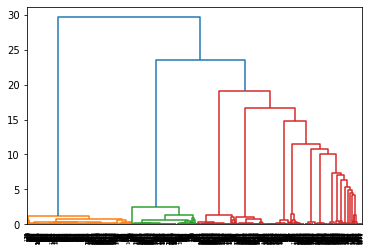

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
linked=linkage(scaled_df,method="ward")
dendrogram(linked)
plt.show()

In [19]:
##labels
scaled_df = scaler.fit_transform(dt1) 

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
wcv=[]##emply list for withincluster variation
silk_score=[]

for i in range(2,21):
    km=KMeans(n_clusters=i,random_state=0)
    km.fit(scaled_df)
    wcv.append(km.inertia_)
    silk_score.append(silhouette_score(scaled_df,km.labels_))

Text(0, 0.5, 'within cluster variation')

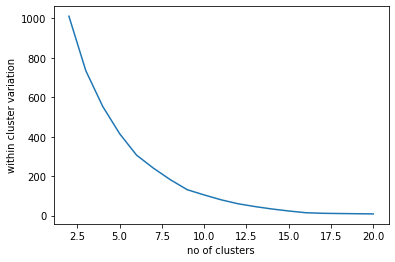

In [20]:
##elbow method
import matplotlib.pyplot as plt
plt.plot(range(2,21),wcv)
plt.xlabel("no of clusters")
plt.ylabel("within cluster variation")
#elbow seems like 3-5

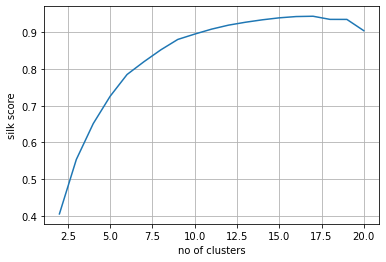

In [21]:
##silhoutte score
plt.plot(range(2,21),silk_score)
plt.xlabel("no of clusters")
plt.ylabel("silk score")
plt.grid()

In [22]:
##kmeans for 3
km2=KMeans(n_clusters=3,random_state=0)
km2.fit(scaled_df)

km2.labels_
dt1["labels"]=km2.labels_

In [23]:
##intercept it using pandas
##cluster 0
df0 = dt1.loc[dt1["labels"]==0].describe()
df0_mean=df0.loc["mean",:].apply(str)
mean_list0 = df0_mean.values.tolist()

In [24]:
##cluster 1
df1 = dt1.loc[dt1["labels"]==1].describe()
df1_mean=df1.loc["mean",:].apply(str)
mean_list1 = df1_mean.values.tolist()

In [25]:
##cluster 2
df2=dt1.loc[dt1["labels"]==2].describe()
df2_mean=df2.loc["mean",:].apply(str)
mean_list2 = df2_mean.values.tolist()

## 🔍 Final Evaluation

The model achieved an R² score of 0.85 on the Random Forest test set, indicating good predictive performance.
